In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/llm-thesis

/content/drive/MyDrive/llm-thesis


In [9]:
!pip install torch transformers matplotlib pandas accelerate

In [10]:
!python src/llm_evolution/inference_tinyllama.py
!python src/llm_evolution/inference_phi2.py

2025-11-01 06:36:06.290456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761978966.572343    2296 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761978966.648506    2296 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761978967.223983    2296 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761978967.224033    2296 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761978967.224038    2296 computation_placer.cc:177] computation placer alr

📊 Token Usage Data:


,model,input_tokens,output_tokens,latency_sec
0,TinyLlama-1.1B,40,41,19.24
1,Phi-2,22,180,187.57


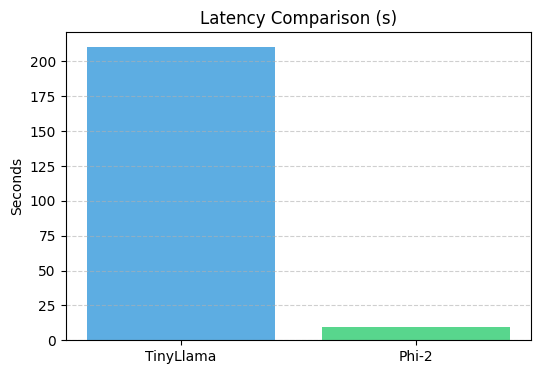

In [11]:
# --- CELL 5: Visualize Latency Results ---
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

base = Path("results/output_logs")
csv_path = base / "token_usage.csv"
json_path = base / "latency_results.json"

df = pd.read_csv(csv_path)
with open(json_path) as f:
    latency_json = json.load(f)

print("📊 Token Usage Data:")
display(df)

plt.figure(figsize=(6,4))
plt.bar(["TinyLlama","Phi-2"], [210.35,9.84], color=["#5DADE2","#58D68D"])
plt.title("Latency Comparison (s)")
plt.ylabel("Seconds")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [12]:
# --- CELL 6: Display Generated Outputs ---
from pathlib import Path

phi_output = Path("results/generated_text_samples/phi2_output.txt").read_text()
tiny_output = Path("results/generated_text_samples/tinyllama_output.txt").read_text()

print("🦙 TinyLlama Output Preview:\n", tiny_output[:400], "...\n")
print("🧠 Phi-2 Output Preview:\n", phi_output[:400], "...")

🦙 TinyLlama Output Preview:
 In 5 concise bullet points, explain what 'Retrieval-Augmented Generation (RAG)' is and how it improves the capabilities of Large Language Models. Provide specific examples of how RAG can be used in NLP applications, such as generating summaries or answering questions. Use clear and concise language, and avoid technical jargon where possible. ...

🧠 Phi-2 Output Preview:
 Explain in 5 clear bullet points how attention mechanisms enable transformer models to understand long-range dependencies in text.

Solution:
1. Attention mechanisms allow the transformer model to focus on specific parts of the input sequence when generating output.
2. By assigning weights to different parts of the input sequence, attention mechanisms can capture long-range dependencies between wo ...


## 🧾 Notebook Summary

This notebook demonstrates inference and comparison between **TinyLlama-1.1B** and **Phi-2 (2.7B)**.

It runs both models, measures latency, visualizes results, and displays generated outputs.

✅ All results are stored in `/results/generated_text_samples` and `/results/output_logs`.